In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/epg/"
epg_4397 = pd.read_pickle(parent_epg + "4397" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [26]:
dvcsSimInb = epg_4397
bkgSimInb = epg_4076

In [27]:
dvcsSimInb = dvcsSimInb.loc[dvcsSimInb.Ge>2]
bkgSimInb = bkgSimInb.loc[bkgSimInb.Ge>2]

## CD cuts

In [135]:
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]

In [136]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [137]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 1986.6255367006386 94
0.0007287038893367681 143.79454842937497 94
[ 2.61211576e-01  2.23429032e-02  6.06460315e-02  2.34015041e+00
  3.04298260e+00 -3.24377547e+01] -0.10220881797017176 0.14689462427566188 0.0007287038893367681
0.3106186190597957 100.24448106992634 94
[ 1.22621798e-01  1.98320905e-02  4.42103702e-02  3.92605951e+00
  6.64987733e+00 -9.70200634e+01] -0.07096490916895402 0.11062909025338716 0.3106186190597957
0.325858421559461 99.63402870849968 94
[ 2.13237857e-01  1.77111933e-02  4.80327200e-02  4.52195734e+00
  7.86204481e+00 -8.79081083e+01] -0.08093595305175472 0.1163583396767607 0.325858421559461
0.07547060995615895 114.34283525403728 94
0.439421596690603 95.4311291120612 94
[ 1.25446192e-01  1.88227863e-02  4.20977632e-02  4.77755697e+00
  8.60397247e+00 -1.25338253e+02] -0.06763544897988924 0.10528102151798045 0.439421596690603
0.16015160583081633 107.57046152125758 94
0.37805535428292225 97.63968372595461 94
0.8598650307865922 79.35750496011376 94
[7.96805868

In [138]:
len(dvcsSimInbFD)

271848

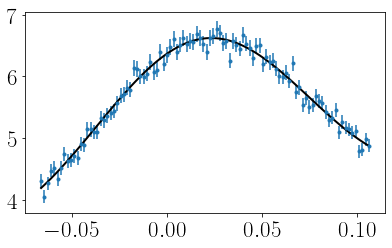

In [139]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [140]:
print(lb_opt, ub_opt)

-0.1762501366804946 0.21362172098583965


In [141]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_ep<0.214)&(dvcsSimInbFD.MM2_ep>-0.176)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_ep<0.214)&(bkgSimInbFD.MM2_ep>-0.176)]

In [142]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 27588.964032039727 94
0.025362731582223685 122.61423775636852 94
[ 0.36973505  0.969202    0.27497982 -0.16120113  1.10705758 -0.41576561] 0.40446249265718304 1.5339414980224113 0.025362731582223685
0.3017668306252259 100.6061489144079 94
[ 0.48180093  0.96899662  0.290718   -0.14762831  0.96741267 -0.2955005 ] 0.3719348519674117 1.5660583882981465 0.3017668306252259
0.5228443231379384 92.55405032538897 94
[ 0.47105655  0.96954284  0.29044187 -0.12644296  0.90647431 -0.27725574] 0.3730481747249659 1.5660375099115802 0.5228443231379384
0.4838641668347141 93.88770006882542 94
0.5662447901161443 91.07481701400906 94
[ 0.48938087  0.9696579   0.29347217 -0.10894577  0.8338961  -0.23988804] 0.3669397371558365 1.572376052976237 0.5662447901161443
0.4834951733703947 93.90039062732625 94
0.4024445380193552 96.74796379686119 94
0.3993829841823294 96.85876515176187 94
0.4404617906904007 95.39458518789897 94


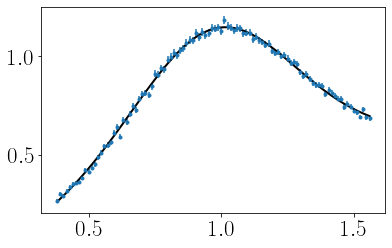

In [143]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [144]:
print(lb_opt, ub_opt)

0.08924137269070254 1.850074417441371


In [145]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_eg<1.850)&(dvcsSimInbFD.MM2_eg>0.0892)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_eg<1.850)&(bkgSimInbFD.MM2_eg>0.0892)]

In [146]:
len(dvcsSimInbFD)

155210

In [147]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.ME_epg, bins = np.linspace(-1, 1, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.ME_epg, bins = np.linspace(-1, 1, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 13507.640167927966 94
0.0 3022.853456895817 94
0.3899349874364667 97.20268381574651 94
[ 0.28955637  0.08031753  0.20971194  0.80000976  0.75360859 -1.50428841] -0.3503781470878282 0.511013199282183 0.3899349874364667
0.5674257832038103 91.03449009226718 94
[ 1.18695216  0.08365474  0.29743448 -0.13489638  0.36503072  1.34675744] -0.527201001420345 0.6945104754949901 0.5674257832038103
0.0 343.9319945911195 94
0.24044415233707872 103.29276152551917 94
0.3096545189577612 100.28360858254683 94
0.31346938691390525 100.12915001241758 94
0.4832608086079321 93.90845183183211 94
0.16536871443968104 107.25263967627198 94


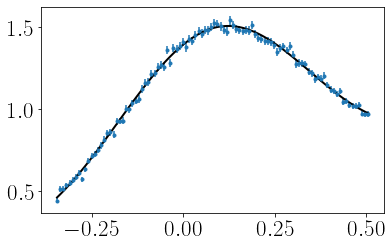

In [148]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [149]:
print(lb_opt, ub_opt)

-0.8086487017551172 0.9759581758297624


In [150]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.ME_epg<0.976)&(dvcsSimInbFD.ME_epg>-0.809)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.ME_epg<0.976)&(bkgSimInbFD.ME_epg>-0.809)]

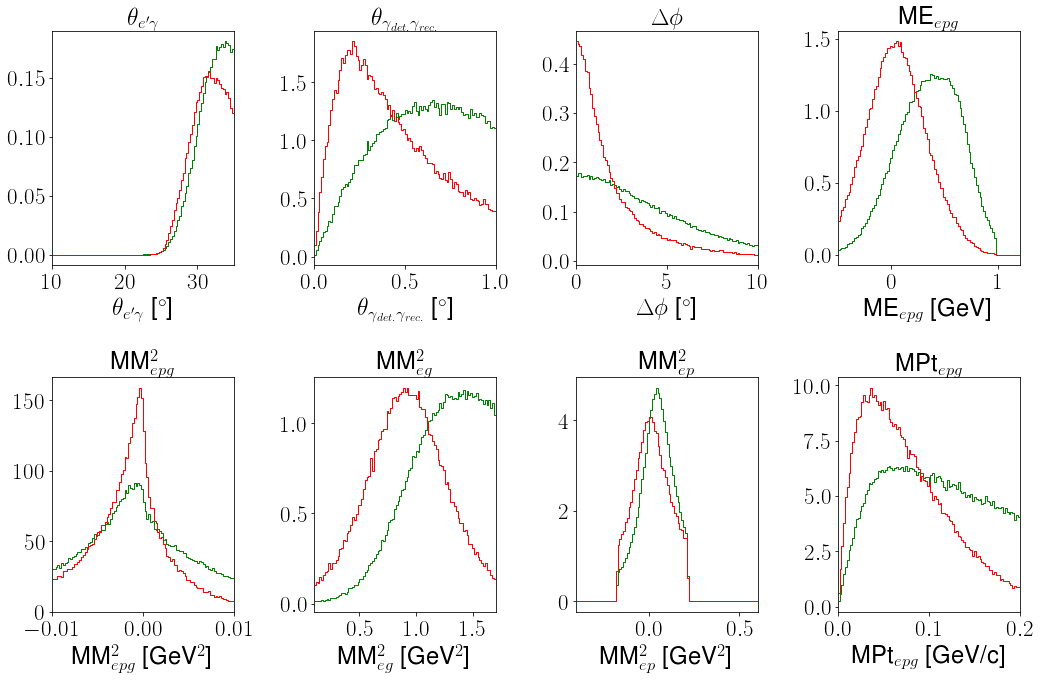

<Figure size 432x288 with 0 Axes>

In [151]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [152]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.coplanarity, bins = np.linspace(0, 10,  101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[2, 0.8, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(lb, ub, 31))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.coplanarity, bins = np.linspace(lb, ub, 31))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit2, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 15#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit2(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 2241.748720794854 96
[ 0.31286013  1.23128545  0.12930984 -0.01211917] 0 15 0.0
0.0 12410.87029269295 26
0.0 12410.727540561404 26
0.0 12410.676540257096 26
0.0 12410.658223675471 26
0.0 12410.658223675471 26
0.0 12410.658223675471 26
0.0 12410.658223675471 26
0.0 12410.658223675471 26
0.0 12410.658223675471 26


In [153]:
limit = 8.3
3*np.sqrt(sum(dvcsSimInbFD.loc[dvcsSimInbFD.coplanarity<limit].coplanarity**2)/len(dvcsSimInbFD.loc[dvcsSimInbFD.coplanarity<limit]))

8.290650154246821

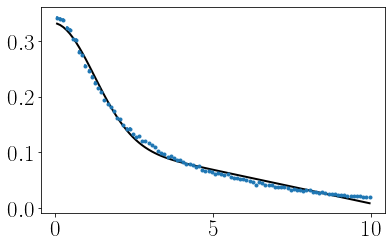

In [154]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit2(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [155]:
params_opt

array([ 0.31286013,  1.23128545,  0.12930984, -0.01211917])

In [156]:
print(ub_opt)

3.6938563614102833


In [157]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.coplanarity<8.3)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.coplanarity<8.3)]

In [158]:
def lstsq_normfit3(args, x, y):
#     print(args, x, y)
    return normfit3(args, x) - y
def normfit3(args, x):
#     df = args
    loc, scale, a, b = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x

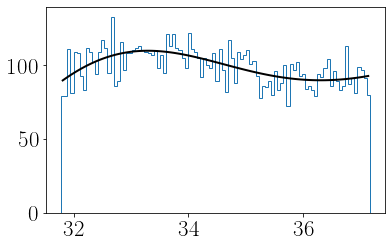

3.0 [ 3.24076178e+01  2.20373073e+00 -9.72328196e-01  3.03793661e-02] 0.4146939792044121
32.40761776524284 25.79642556435354 29.490633177299785


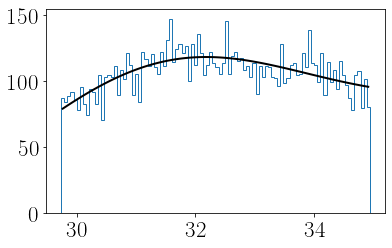

3.5 [ 3.13922060e+01  2.47451035e+00 -5.73020107e-01  1.96754685e-02] 0.028042660926597796
31.392206041940018 23.96867499981724 29.673145720522122


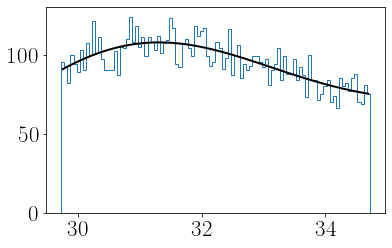

4.0 [ 3.07682384e+01  2.35501133e+00 -4.45123307e-01  1.61592541e-02] 0.9799123317860429
30.768238395906266 23.703204410943375 29.432868474495276


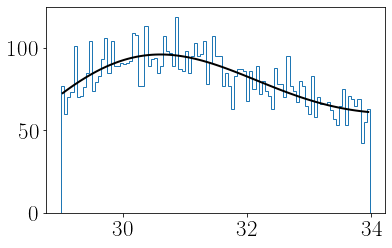

4.5 [ 3.01423475e+01  2.00846601e+00 -6.37432883e-01  2.22461412e-02] 0.09154874267144686
30.14234752921851 24.116949504335807 28.23004888089311


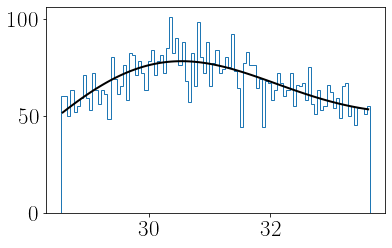

5.0 [ 3.00077214e+01  2.08890072e+00 -6.42919464e-01  2.24826086e-02] 0.033154488462961984
30.007721356957475 23.74101920425352 28.078962965210767


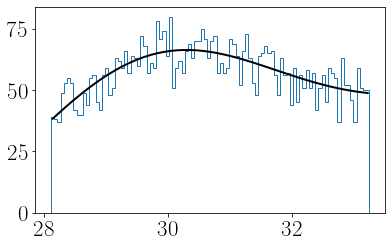

5.5 [ 2.96633681e+01  2.07266363e+00 -7.86603284e-01  2.73458749e-02] 0.7722290350135445
29.663368095457624 23.445377196961637 27.30355824493475


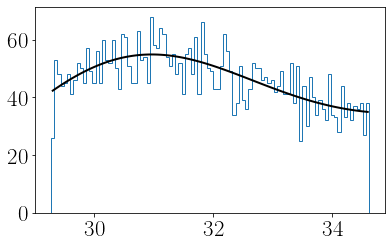

6.0 [ 3.04683465e+01  2.18584315e+00 -5.31962755e-01  1.85339801e-02] 0.28528145819151496
30.468346527054756 23.910817068185864 28.872458260557693


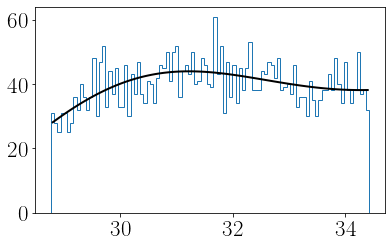

6.5 [ 3.01106477e+01  2.46829831e+00 -7.81615176e-01  2.66002102e-02] 0.8608570245638567
30.110647697432565 22.705752774603035 27.76580216884971


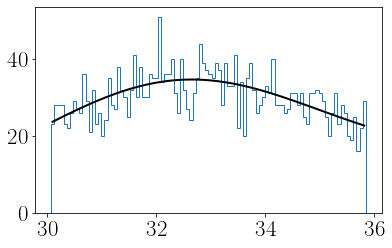

7.0 [ 3.23748689e+01  2.60778497e+00 -1.51583442e-01  6.07203184e-03] 0.7899233407912805
32.37486888067232 24.551513964016266 31.92011855531846


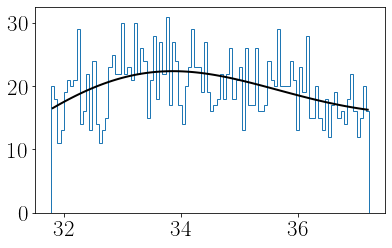

7.5 [ 3.32084310e+01  2.44945686e+00 -5.33830670e-01  1.72357193e-02] 0.2985611766606918
33.20843096779667 25.860060383867136 31.60693895802699


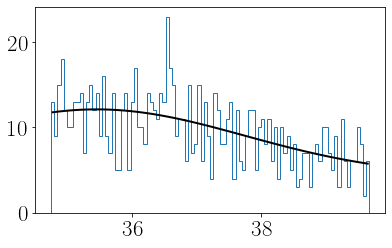

8.0 [3.54152188e+01 2.32634806e+00 4.51047517e-02 1.08469597e-03] 0.0004182654413728004
35.415218784620414 28.43617460875118 35.55053303958479


In [159]:
GpEdges = np.linspace(3, 8.5, 12)
GeEdges = GpEdges
GpArray = []
lbs = []
ubs = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimInbFD.loc[(dvcsSimInbFD.Gp>GpMin)&(dvcsSimInbFD.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-0.5*sigma, mu+1*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit3, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    lbs.append(res_lsq.x[0]-2*res_lsq.x[1])
    ubs.append(res_lsq.x[0]+2*res_lsq.x[1])

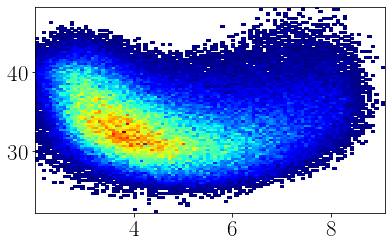

In [160]:
plt.hist2d(dvcsSimInbFD.Ge, dvcsSimInbFD.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

In [161]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[ 0.71007712 -7.58233011 54.38637508]
[ 0.58938208 -6.36072264 42.47579894]


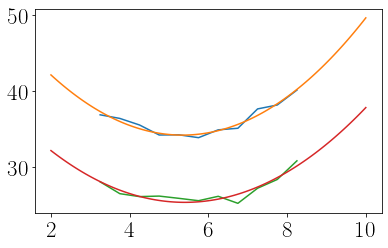

In [162]:
plt.plot(GpArray, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=(GpArray, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([ 0.710, -7.582, 54.386])(np.linspace(2, 10, 101)))
print(res_lsq.x)
plt.plot(GpArray, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=(GpArray, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([ 0.589, -6.361, 42.476])(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [163]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.coneAngle<np.poly1d([ 0.710, -7.582, 54.386])(dvcsSimInbFD.Gp))&(dvcsSimInbFD.coneAngle>np.poly1d([ 0.589, -6.361, 42.476])(dvcsSimInbFD.Gp))]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.coneAngle<np.poly1d([ 0.710, -7.582, 54.386])(bkgSimInbFD.Gp))&(bkgSimInbFD.coneAngle>np.poly1d([ 0.589, -6.361, 42.476])(bkgSimInbFD.Gp))]

In [164]:
len(dvcsSimInbFD)

103557

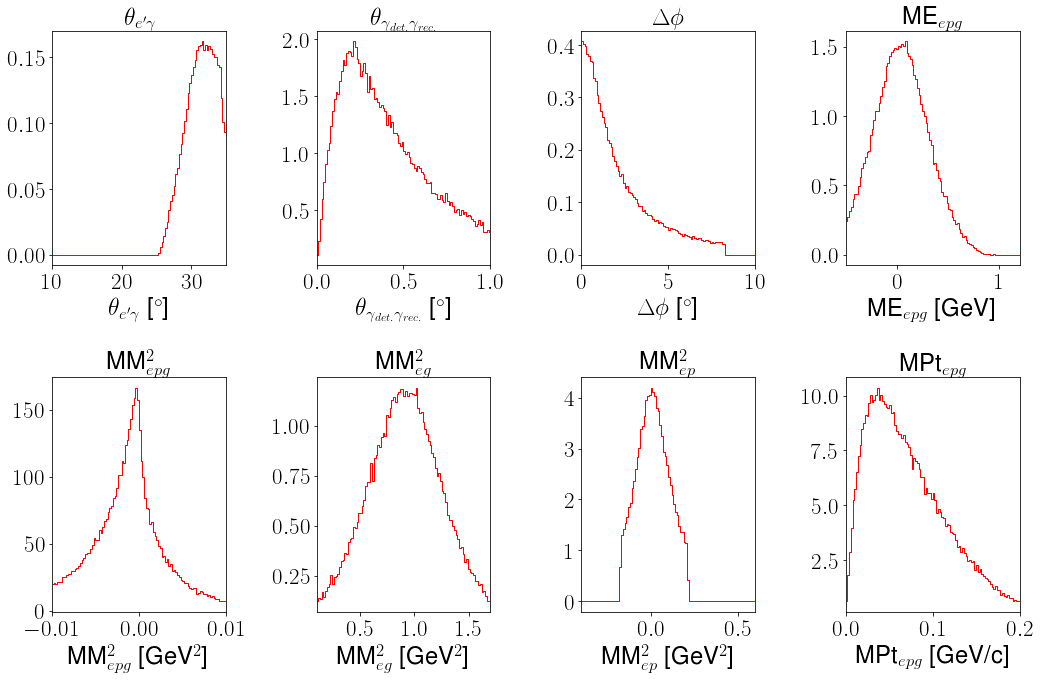

<Figure size 432x288 with 0 Axes>

In [165]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [173]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MPt, bins = np.linspace(0.005, 0.15, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MPt, bins = np.linspace(0.005, 0.15, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.04)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+3*scale#norm.ppf(1-0.0013, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

3.993375395250354e-06 51.098024360500474 14
[ 6.94191875e+01 -7.64759025e-02  9.85317220e-02 -2.07732403e+02
  2.17750994e+03 -6.02160266e+03] 0.005 0.04 3.993375395250354e-06


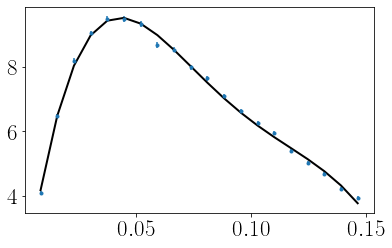

In [174]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [175]:
params_opt

array([ 6.94191875e+01, -7.64759025e-02,  9.85317220e-02, -2.07732403e+02,
        2.17750994e+03, -6.02160266e+03])

In [176]:
print(ub_opt)

0.21911926345089439


In [177]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MPt<0.219)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MPt<0.219)]

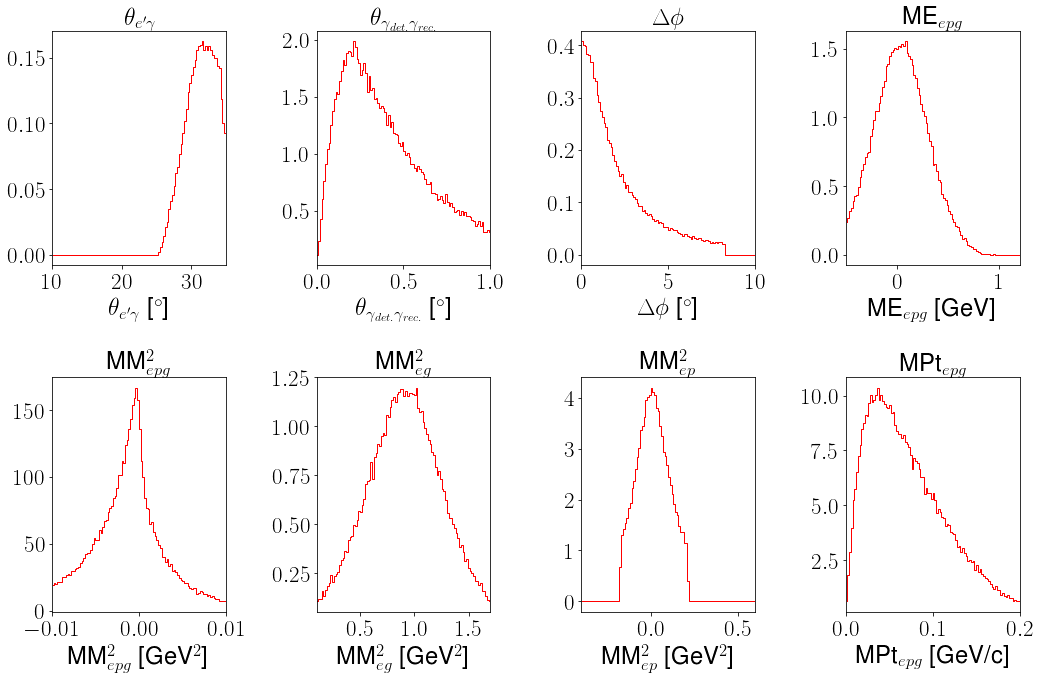

<Figure size 432x288 with 0 Axes>

In [178]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [192]:
pvalue_opt = -0.1
for i in range(0, 3):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.reconGam, bins = np.linspace(0.05, 1.1, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.reconGam, bins = np.linspace(0.05, 1.1, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.1#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 1)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+3*scale
#         print(ub_opt, loc + 3*scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 354.42811308711595 94
[ 39.04785495  -0.37649505   0.59055175 -21.3470104   34.59151161
 -14.44372097] 0.1 1 0.0
1.0647265346275248e-05 163.9935938972548 94
[ 48.29272829  -0.42183326   0.59367105 -24.86527832  41.86622191
 -18.3332085 ] 0.1 1 1.0647265346275248e-05
1.0647381902928466e-05 163.99354556534325 94
[ 48.29377152  -0.42183781   0.59367386 -24.86562607  41.86667623
 -18.33336211] 0.1 1 1.0647381902928466e-05


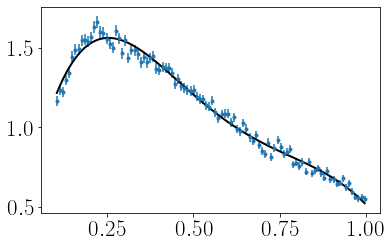

In [193]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [194]:
print(ub_opt)

1.359183754181942


In [195]:
dvcsSimInbFD = dvcsSimInbFD.loc[dvcsSimInbFD.reconGam<1.359]
bkgSimInbFD = bkgSimInbFD.loc[bkgSimInbFD.reconGam<1.359]

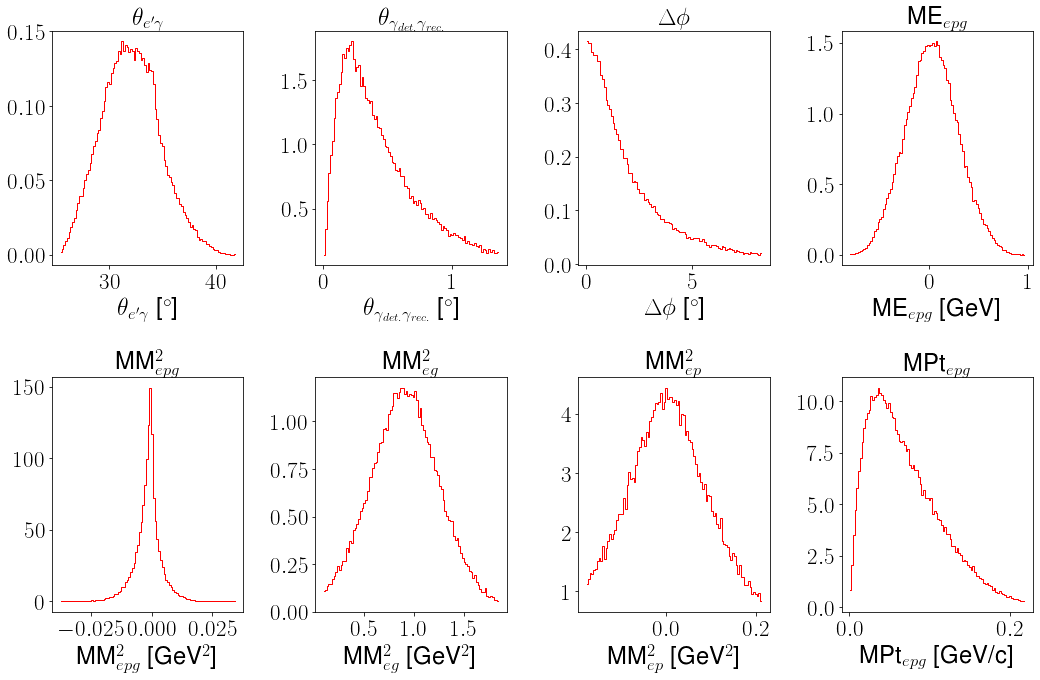

<Figure size 432x288 with 0 Axes>

In [196]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [197]:
print(dvcsSimInbFD.MM2_epg.mean()+3*dvcsSimInbFD.MM2_epg.std(), dvcsSimInbFD.MM2_epg.mean()-3*dvcsSimInbFD.MM2_epg.std())

0.014771179349701027 -0.017941491347700067
